# Weighted Undirected Graph for Street Grid

This notebook creates a weighted undirected graph representing a 20x10 street grid with 200 intersection points.

In [97]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from utils.create_graph import create_graph
import copy

# Parameters
WIDTH = 20  # horizontal streets
HEIGHT = 10 # vertical streets
HORIZONTAL_WEIGHT = 2
VERTICAL_WEIGHT = 1
alpha = 2
beta = 1

edges, vertices = create_graph()

Total vertices: 200
First 10 vertices: [(0, 0, 0), (1, 0, 1), (2, 0, 2), (3, 0, 3), (4, 0, 4), (5, 0, 5), (6, 0, 6), (7, 0, 7), (8, 0, 8), (9, 0, 9)]
Total edges: 370
Horizontal edges: 190
Vertical edges: 180

First 10 edges: [(0, 1, 2), (1, 2, 2), (2, 3, 2), (3, 4, 2), (4, 5, 2), (5, 6, 2), (6, 7, 2), (7, 8, 2), (8, 9, 2), (9, 10, 2)]
Last 10 edges: [(170, 190, 1), (171, 191, 1), (172, 192, 1), (173, 193, 1), (174, 194, 1), (175, 195, 1), (176, 196, 1), (177, 197, 1), (178, 198, 1), (179, 199, 1)]


In [8]:
import random

def generate_random_point_pairs(n, total_vertices=200):
    """
    Generate n random sets of two points (start and end) at vertices on the grid.
    
    Args:
        n (int): Number of random point pairs to generate
        total_vertices (int): Total number of vertices in the grid (default: 200)
    
    Returns:
        list: List of tuples, each containing (start_vertex, end_vertex)
    """
    point_pairs = []
    
    for i in range(n):
        # Generate two different random vertices
        start_vertex = random.randint(0, total_vertices - 1)
        end_vertex = random.randint(0, total_vertices - 1)
        
        # Ensure start and end are different
        while end_vertex == start_vertex:
            end_vertex = random.randint(0, total_vertices - 1)
        
        point_pairs.append((start_vertex, end_vertex))
    
    return point_pairs

# Generate 5 random point pairs as an example
n_pairs = 5
random_pairs = generate_random_point_pairs(n_pairs)

print(f"Generated {n_pairs} random point pairs:")
for i, (start, end) in enumerate(random_pairs, 1):
    print(f"Pair {i}: Start vertex {start}, End vertex {end}")

Generated 5 random point pairs:
Pair 1: Start vertex 0, End vertex 166
Pair 2: Start vertex 144, End vertex 160
Pair 3: Start vertex 34, End vertex 145
Pair 4: Start vertex 47, End vertex 124
Pair 5: Start vertex 15, End vertex 58


Graph nodes: 200
Graph edges: 370


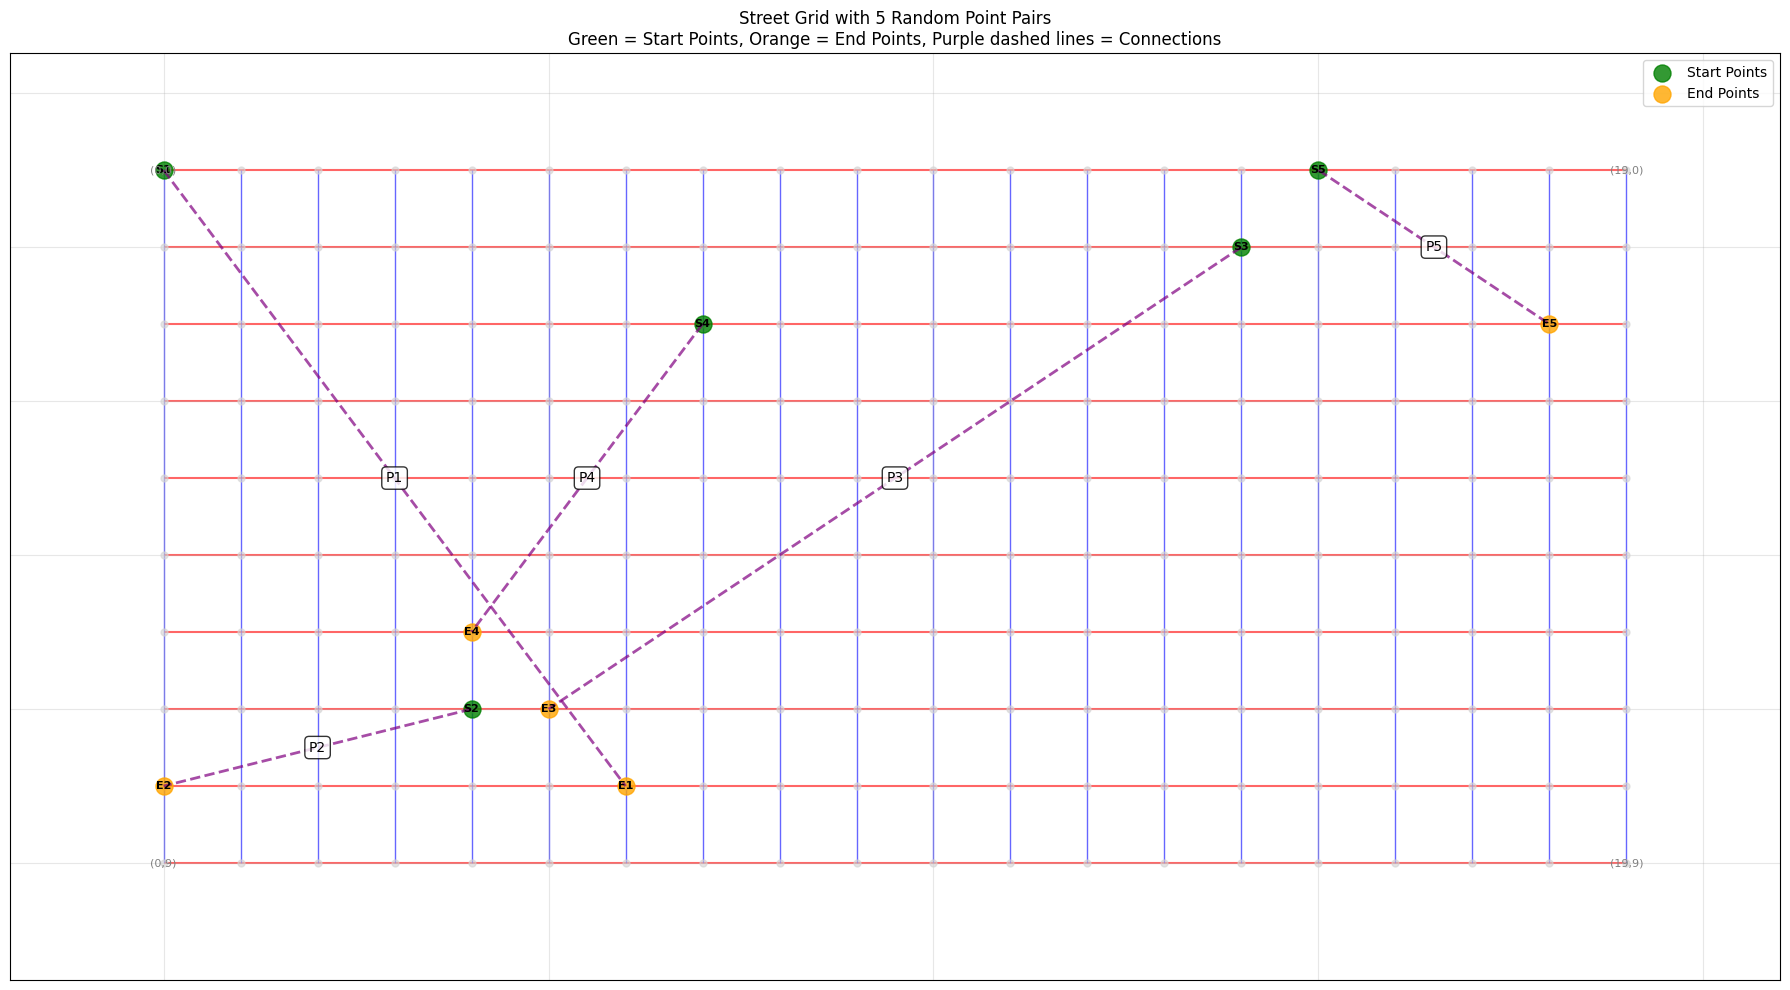


Visualization Summary:
- Total vertices: 200
- Random point pairs generated: 5
- Green circles: Start points (S1, S2, ...)
- Orange circles: End points (E1, E2, ...)
- Purple dashed lines: Direct connections between pairs
- P1, P2, ... labels: Pair identifiers on connection lines


In [64]:
def plot_graph(edges,vertices,random_pairs,routes):
    # Create NetworkX graph
    G = nx.Graph()

    # Add vertices
    for vertex_index, row, col in vertices:
        G.add_node(vertex_index, pos=(col, HEIGHT - row - 1))  # Flip y-axis for proper visualization

    # Add edges with weights
    for start, end, weight in edges:
        G.add_edge(start, end, weight=weight)

    print(f"Graph nodes: {G.number_of_nodes()}")
    print(f"Graph edges: {G.number_of_edges()}")

    # Create enhanced visualization with random point pairs
    plt.figure(figsize=(18, 10))

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # Separate edges by weight for different colors
    horizontal_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] == HORIZONTAL_WEIGHT]
    vertical_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] == VERTICAL_WEIGHT]

    # Draw the basic graph
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=25, alpha=0.6)

    # Draw horizontal edges in red (weight 2)
    nx.draw_networkx_edges(G, pos, edgelist=horizontal_edges, edge_color='red', width=1.5, alpha=0.6)

    # Draw vertical edges in blue (weight 1)
    nx.draw_networkx_edges(G, pos, edgelist=vertical_edges, edge_color='blue', width=1, alpha=0.6)

    # Highlight start and end points
    start_nodes = [pair[0] for pair in random_pairs]
    end_nodes = [pair[1] for pair in random_pairs]

    # Draw start points in green
    nx.draw_networkx_nodes(G, pos, nodelist=start_nodes, node_color='green', 
                        node_size=150, alpha=0.8, label='Start Points')

    # Draw end points in orange
    nx.draw_networkx_nodes(G, pos, nodelist=end_nodes, node_color='orange', 
                        node_size=150, alpha=0.8, label='End Points')

    # Draw lines connecting start and end points
    for i, (start, end) in enumerate(random_pairs):
        start_pos = pos[start]
        end_pos = pos[end]
        plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 
                'purple', linewidth=2, alpha=0.7, linestyle='--')
        
        # Add pair number labels
        mid_x = (start_pos[0] + end_pos[0]) / 2
        mid_y = (start_pos[1] + end_pos[1]) / 2
        plt.text(mid_x, mid_y, f'P{i+1}', fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # Add labels to start and end points
    point_labels = {}
    for i, (start, end) in enumerate(random_pairs):
        point_labels[start] = f'S{i+1}'
        point_labels[end] = f'E{i+1}'

    nx.draw_networkx_labels(G, pos, point_labels, font_size=8, font_color='black', font_weight='bold')

    # Add corner labels for reference
    corner_nodes = {0: '(0,0)', WIDTH-1: f'({WIDTH-1},0)', 
                    (HEIGHT-1)*WIDTH: f'(0,{HEIGHT-1})', 
                    HEIGHT*WIDTH-1: f'({WIDTH-1},{HEIGHT-1})'}

    nx.draw_networkx_labels(G, pos, corner_nodes, font_size=8, font_color='gray')

    # Draw Routes
    if routes:
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
        
        for i, route in enumerate(routes):
            route = route[0]
            if len(route) < 2:
                continue
                
            color = colors[i % len(colors)]
            
            # Draw route edges
            route_edges = [(route[j], route[j+1]) for j in range(len(route)-1)]
            nx.draw_networkx_edges(G, pos, edgelist=route_edges, 
                                 edge_color=color, width=3, alpha=0.8)
            
            # Highlight start and end nodes
            nx.draw_networkx_nodes(G, pos, nodelist=[route[0]], 
                                 node_color=color, node_size=100, alpha=1.0, 
                                 node_shape='s')  # Square for start
            nx.draw_networkx_nodes(G, pos, nodelist=[route[-1]], 
                                 node_color=color, node_size=100, alpha=1.0, 
                                 node_shape='^')  # Triangle for end
    

    plt.title(f'Street Grid with {n_pairs} Random Point Pairs\nGreen = Start Points, Orange = End Points, Purple dashed lines = Connections')
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"\nVisualization Summary:")
    print(f"- Total vertices: {G.number_of_nodes()}")
    print(f"- Random point pairs generated: {n_pairs}")
    print(f"- Green circles: Start points (S1, S2, ...)")
    print(f"- Orange circles: End points (E1, E2, ...)")
    print(f"- Purple dashed lines: Direct connections between pairs")
    print(f"- P1, P2, ... labels: Pair identifiers on connection lines")

plot_graph(edges,vertices,random_pairs,None)

In [24]:
from distance_analysis import calculate_distances_to_all_vertices, build_adjacency_list
distances = calculate_distances_to_all_vertices(random_pairs=random_pairs,edges=edges,total_vertices=len(vertices))
adj_list = build_adjacency_list(edges=edges)

Processing pair 1/5: Start 0, End 166
Processing pair 2/5: Start 144, End 160
Processing pair 3/5: Start 34, End 145
Processing pair 4/5: Start 47, End 124
Processing pair 5/5: Start 15, End 58


In [99]:
def toCoord(vertex):
    row,col = vertex // 20, vertex % 20
    return row,col

def distTo(v1,v2):
    a,b = toCoord(v1)
    c,d = toCoord(v2)
    return abs(a-c) + abs(b-d)*2

# Verify distances are correct:
s = 0
for i in range(len(distances)):
    for j in range(len(distances[i])):
        start,end = random_pairs[j]
        d1,d2 = distTo(start,i), distTo(end,i)
        #print(f"({d1},{d2})",distances[i][j])
        s += (d1-distances[i][j][0] + d2-distances[i][j][1])
print(s) # should be all diff ddzero

0


## Get the cost and the actions per state (aka the "Environment")

In [100]:
# For a given set of two (or more) routes (list of sequential edges), you can just brute force compute the efficiency.

# For a route, find the start and end points. Then search through the list of points 

routes = [[[160,161,162,163],3],[[2],0]] # (list of vertices, distance)
actions_cache = {}

def cost(routes,random_pairs,alpha,beta):

    cost_sum = 0 # sum of cost over all pairs of start and end

    for i in range(len(random_pairs)):
        start,end = random_pairs[i]

        this_pair_cost = float("inf")

        # start and end are vertex indices
        # print(routes)
        for r in routes:
            # print(r)
            route_vertices,bus_dist = r
            # print(route_vertices,bus_dist)
            route_start,route_end = route_vertices[0],route_vertices[-1]
            # print(route_start,route_end)

            # Using bus route, start to start, end to end
            walk1a = distances[route_start][i][0]
            walk1b = distances[route_end][i][1]

            # vs Using bus route, start to end, end to start
            walk2a = distances[route_start][i][1]
            walk2b = distances[route_end][i][0] 
            bus_cost = min((walk1a+ walk1b),(walk2a + walk2b)) * alpha + bus_dist * beta # compute min bus cost

            # vs Walking the whole way
            walking_whole_way_cost = distances[end][i][0] # at the end point, find distance to start (index 0 of tuple) of random_pair i

            #print(this_pair_cost,bus_cost,walking_whole_way_cost)
            this_pair_cost = min(this_pair_cost,min(bus_cost,walking_whole_way_cost))
        
        cost_sum += this_pair_cost

    return cost_sum

def find_weight_between(vertexA,vertexB,adj_list):
    for v,w in adj_list[vertexA]:
        if v == vertexB: 
           return w
    return 0 #


# The state is the routes
def get_actions(routes,random_pairs,adj_list,alpha,beta):

    # Step 1: find all the new STATES you can transition to
    new_states = [] # fill in with new states
    
    # Step 1.1: Find possible edges to ADD
    for i in range(len(routes)):
        r = routes[i]
        route_vertices,bus_dist = r
        # print(route_vertices)
        route_start,route_end = route_vertices[0],route_vertices[-1]
        # print(route_start,route_end)

        # add to both start and end:
        for vertex,weight in adj_list[route_start]:
            if vertex in route_vertices: continue
            else: 
                # Make new state, add new vertex to FRONT, and add to bus distance
                new_state = copy.deepcopy(routes)
                new_state[i][0].insert(0,vertex)
                # print(new_state[i])
                new_state[i][1] += weight
                new_states.append(new_state)
        
        for vertex,weight in adj_list[route_end]:
            if vertex in route_vertices: continue
            else: 
                # Make new state, add new vertex to END, and add to bus distance
                new_state = copy.deepcopy(routes)
                new_state[i][0].append(vertex)
                new_state[i][1] += weight   
                new_states.append(new_state) 

    # Step 1.2: Find possible edges to DELETE, the four start and end ones, except if length 1
    for i in range(len(routes)):
        r = routes[i]
        route_vertices,bus_dist = r
        route_start,route_end = route_vertices[0],route_vertices[-1]

        if len(route_vertices) >= 2:

            # Remove start, subtract weight between first two
            new_state = copy.deepcopy(routes)
            prev_val = new_state[i][0].pop(0)
            new_state[i][1] -= find_weight_between(prev_val,new_state[i][0][0],adj_list)
            new_states.append(new_state)
            

            # Remove end
            new_state = copy.deepcopy(routes)
            prev_val = new_state[i][0].pop()
            new_state[i][1] -= find_weight_between(prev_val,new_state[i][0][-1],adj_list)
            new_states.append(new_state)

    
    # Step 2: find all the REWARDS of the transition
    actions = [] # (state,reward)

    current_cost = cost(routes,random_pairs,alpha,beta)
    action_id = 0
    for s in new_states:
        new_cost = cost(s,random_pairs,alpha,beta) # Compute just with a different state (set of routes)
        # print(current_cost,new_cost)
        cost_delta = new_cost - current_cost # Positive if greater cost to transition
        reward = -1 * cost_delta # Negative cost delta is reward
        action_id += 1
        actions.append((action_id,s,reward))

    return actions

print(get_actions(routes,random_pairs,adj_list,alpha,beta))

[(1, [[[140, 160, 161, 162, 163], 4], [[2], 0]], 0), (2, [[[180, 160, 161, 162, 163], 4], [[2], 0]], 0), (3, [[[160, 161, 162, 163, 164], 5], [[2], 0]], 2), (4, [[[160, 161, 162, 163, 143], 4], [[2], 0]], 1), (5, [[[160, 161, 162, 163, 183], 4], [[2], 0]], 0), (6, [[[160, 161, 162, 163], 3], [[1, 2], 2]], 0), (7, [[[160, 161, 162, 163], 3], [[3, 2], 2]], 0), (8, [[[160, 161, 162, 163], 3], [[22, 2], 1]], 0), (9, [[[160, 161, 162, 163], 3], [[2, 1], 2]], 0), (10, [[[160, 161, 162, 163], 3], [[2, 3], 2]], 0), (11, [[[160, 161, 162, 163], 3], [[2, 22], 1]], 0), (12, [[[161, 162, 163], 1], [[2], 0]], 0), (13, [[[160, 161, 162], 1], [[2], 0]], 0)]


## Define the Q Function / Table

In [101]:
q_map = {}

def get_q(state,action_id):
    routes = state
    state_strs = []
    for r in routes:
        state_strs.append(",".join([str(hex(v)) for v in r[0]]))
    state_str = "-".join(state_strs)
    
    if state_str not in q_map:
        q_map[state_str] = {}
    if action_id not in q_map[state_str]:
        q_map[state_str][action_id] = cost(state,random_pairs,alpha,beta)

    return q_map[state_str][action_id]

def update_q(state,action_id,val):
    routes = state
    state_strs = []
    for r in routes:
        state_strs.append(",".join([str(hex(v)) for v in r[0]]))
    state_str = "-".join(state_strs)
    
    if state_str not in q_map:
        q_map[state_str] = {}
    
    q_map[state_str][action_id] = val

Graph nodes: 200
Graph edges: 370


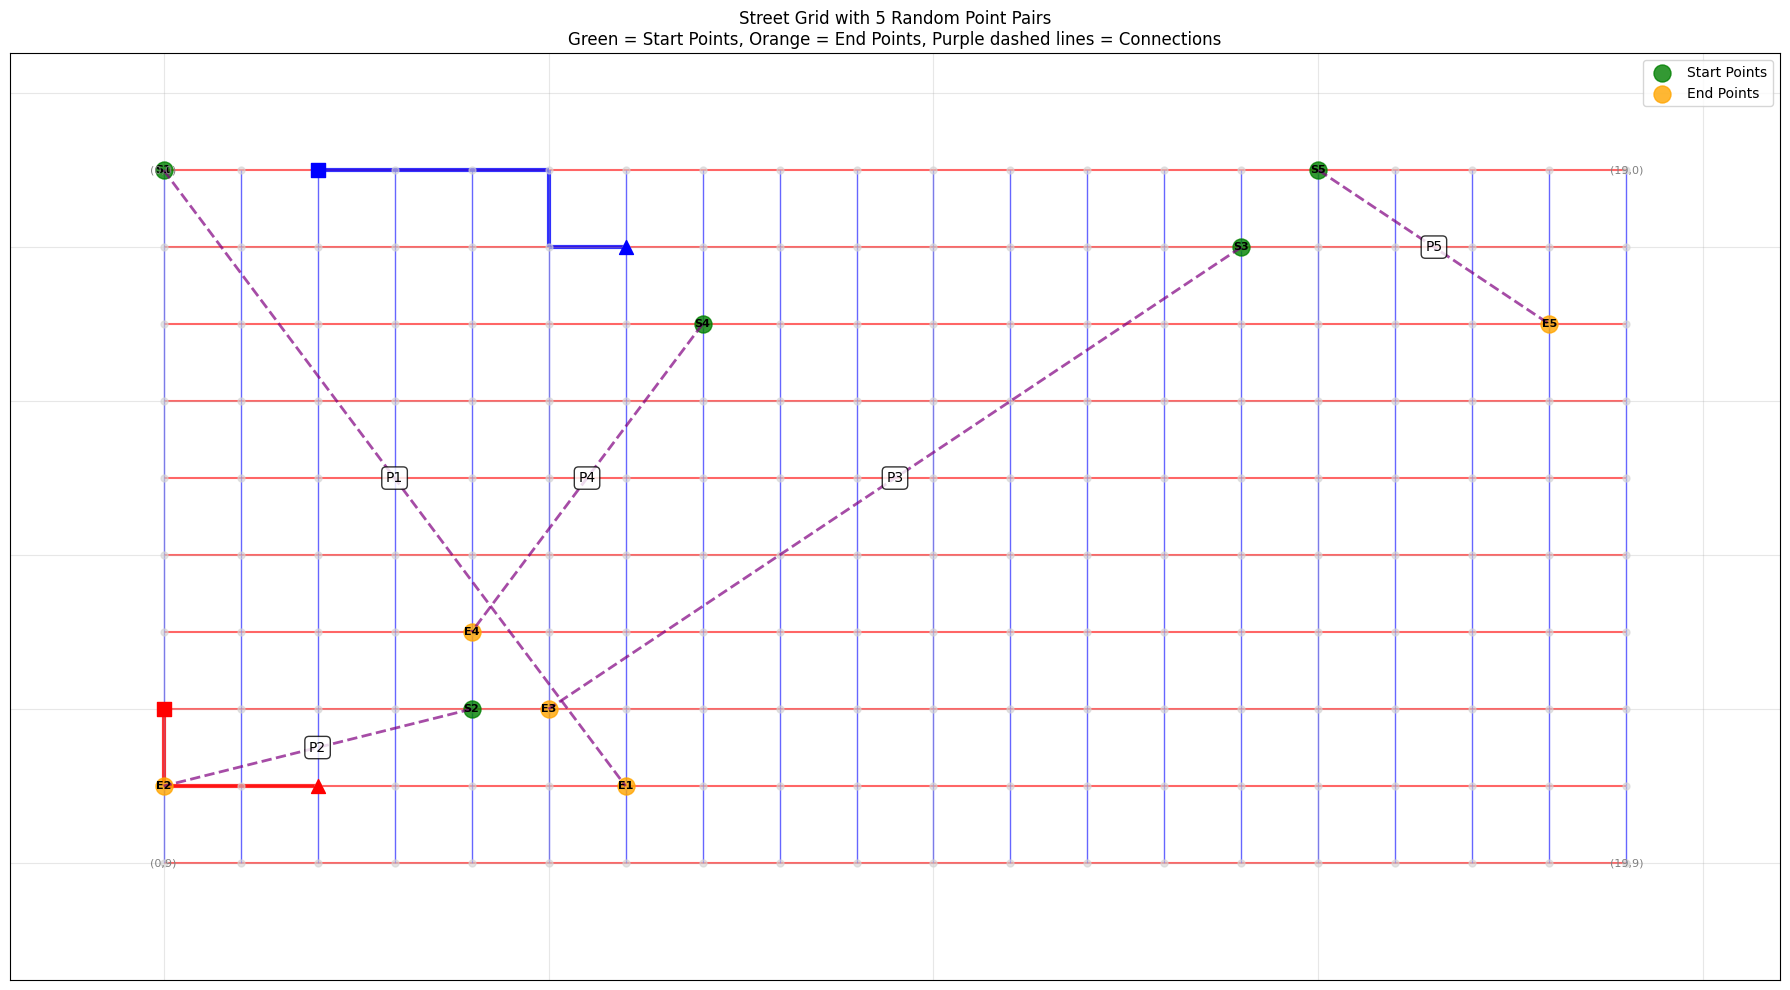


Visualization Summary:
- Total vertices: 200
- Random point pairs generated: 5
- Green circles: Start points (S1, S2, ...)
- Orange circles: End points (E1, E2, ...)
- Purple dashed lines: Direct connections between pairs
- P1, P2, ... labels: Pair identifiers on connection lines


In [ ]:
state = [[[140,160,161,162,162],7],[[2,3,4,5,25,26],9]]
gamma = 0.99
lr = 0.1
epsilon = .1

def policy(state):
    max_q = float("-inf")
    action_id,next_state,reward = 0,state,float('-inf')

    # Simple greedy policy
    actions_list = get_actions(state,random_pairs,adj_list,alpha,beta) 
    for this_action_id,this_next_state,this_reward in actions_list:
        q_val = get_q(this_next_state,this_action_id)
        if q_val > max_q:
            action_id = this_action_id
            next_state = this_next_state
            reward = this_reward
            max_q = q_val
    
    # Epsilon greedy
    if random.random() < epsilon: 
        random_integer = random.randint(0,len(actions_list)-1) # Generates a random integer between 1 and 10 (inclusive)
        action_id, next_state, reward = actions_list[random_integer]

    

    return action_id, next_state, reward, max_q

def q_learn(state,action_id,reward,state_prime):
    val = get_q(state,action_id)
    max_next_q = float('-inf')
    for action_id_prime,_,_ in get_actions(state_prime,random_pairs,adj_list,alpha,beta):
        max_next_q = max(max_next_q,get_q(state_prime,action_id_prime))
    val += lr*(reward + gamma*max_next_q - val)
    update_q(state,action_id,val)


episodes = 200
for e in (range(episodes)):
    total_reward= 0
    state = [[[140,160,161,162,162],7],[[2,3,4,5,25,26],9]]
    steps = 100
    for i in range(steps):
        action_id, next_state, reward, _ = policy(state)
        q_learn(state,action_id,reward,next_state)
        state = next_state
        total_reward = reward + gamma*total_reward
    print(f"Episode {e+1}/{episodes} finished")

plot_graph(edges,vertices,random_pairs,state)